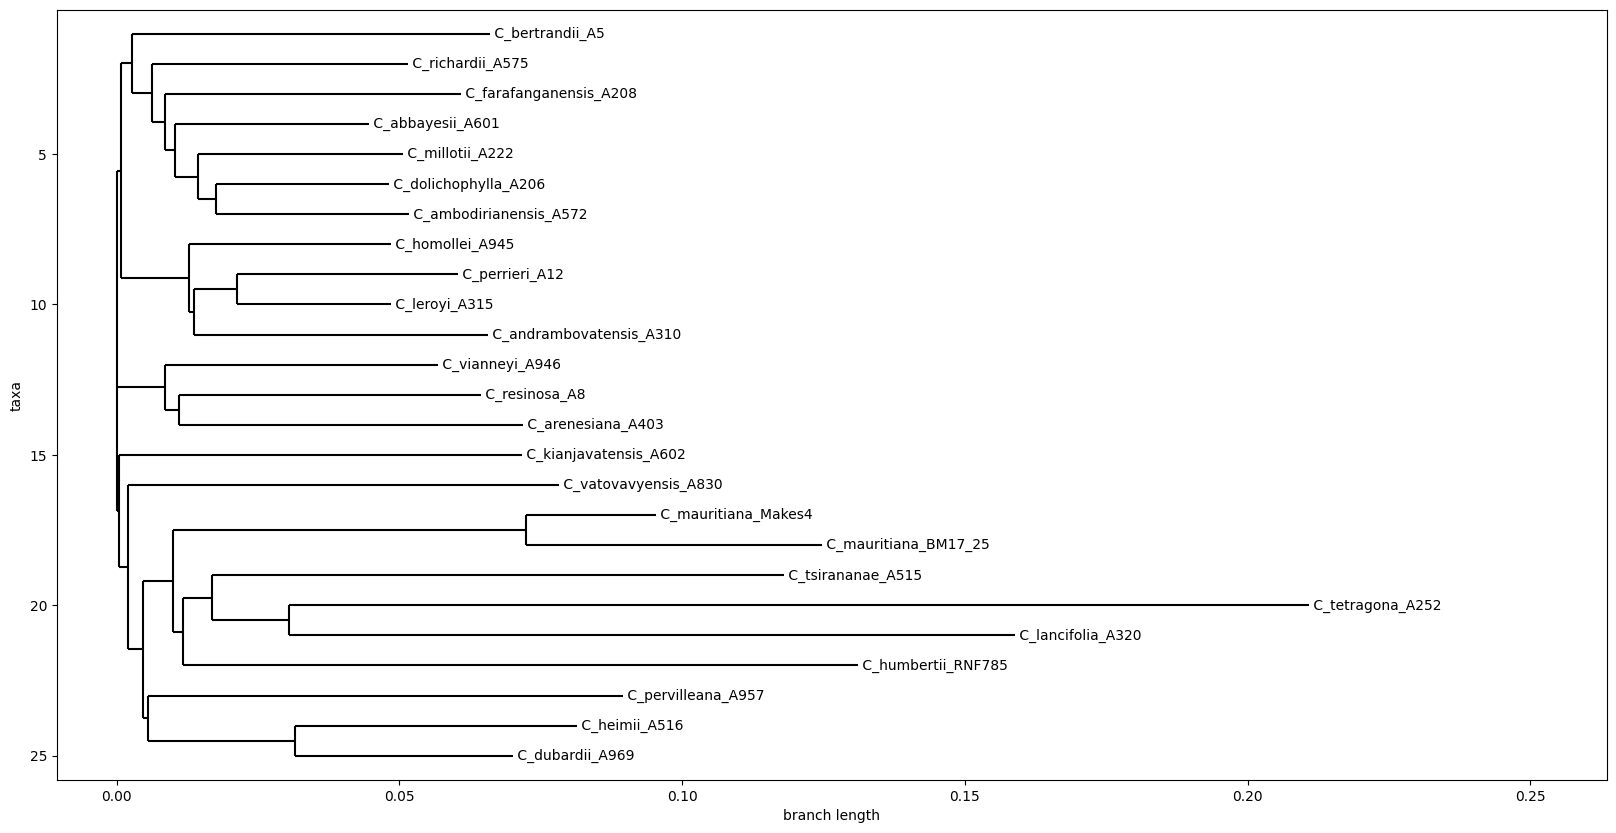

In [1]:
from Bio import SeqIO, AlignIO
from Bio.Phylo.TreeConstruction import DistanceCalculator, DistanceTreeConstructor
from Bio import Phylo
import matplotlib.pyplot as plt

def custom_label(clade):
    if clade.is_terminal():
        return clade.name 
    else:
        return None  # Return None for non-terminal nodes

# Step 1: Parse sequences from the FASTA file
#fasta_file = "data/GBS/aligned.fasta"

fasta_file = r"..\analysis\data\GBS_caffeine\aligned_caffeine.fasta"
alignment = AlignIO.read(fasta_file, "fasta")

# Step 2: Calculate distance matrix
calculator = DistanceCalculator('identity')
distance_matrix = calculator.get_distance(alignment)

# Step 3: Build phylogenetic tree
constructor = DistanceTreeConstructor()
tree = constructor.nj(distance_matrix)

# Step 4: Save tree to Newick file
#output_tree_file = "tree/phylogenetic_tree.nwk"
output_tree_file = r"..\input\aligned_caffeine_tree.nwk"
Phylo.write(tree, output_tree_file, "newick")

# Step 5: Visualize the tree
fig, ax = plt.subplots(figsize=(20, 10))

# Draw the tree
Phylo.draw(tree, axes=ax, label_func=custom_label)

# Show the plot
plt.show()
